In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def impseq(n0, n1, n2):

# Genera x(n) = delta(n-n0); n1 <= n <= n2
# ----------------------------------------------
    n = np.arange(n1, n2+1) # Se crea el vector de muestras

    x = (n-n0) == 0

    return [x,n]

def stepseq(n0, n1, n2):
    # Genera x(n) = u(n - n0); n1 <= n <= n2
    # --------------------------------------
    
    n = np.arange(n1, n2 + 1)   # Vector de muestras
    x = (n >= n0).astype(int)  # Escalón unitario
    
    return x, n

def rampseq(n0, n1, n2, m):
    # Genera r(n) = m(n - n0)u(n - n0); n1 <= n <= n2
    # ------------------------------------------------
    
    n = np.arange(n1, n2 + 1)          # Vector de muestras
    x = m * (n - n0) * (n >= n0)      # Definición matemática
    
    return x, n

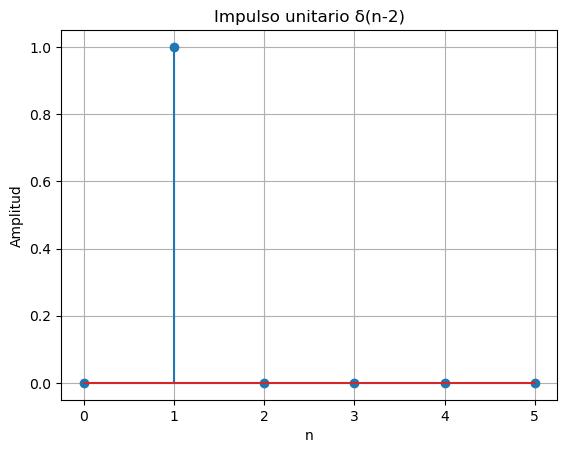

In [16]:
x, n = impseq(1, 0, 5)

plt.stem(n, x)
plt.title("Impulso unitario δ(n-2)")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
[0 0 0 0 0 1 1 1 1 1 1]


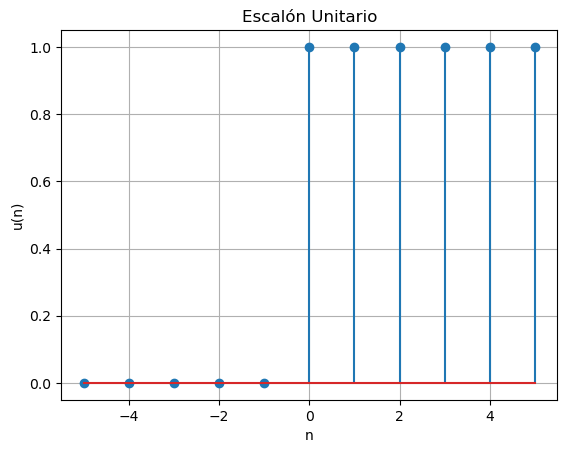

In [ ]:
x, n = stepseq(0, -5, 5)

plt.stem(n, x)
plt.xlabel("n")
plt.ylabel("u(n)")
plt.title("Escalón Unitario")
plt.grid()
plt.show()

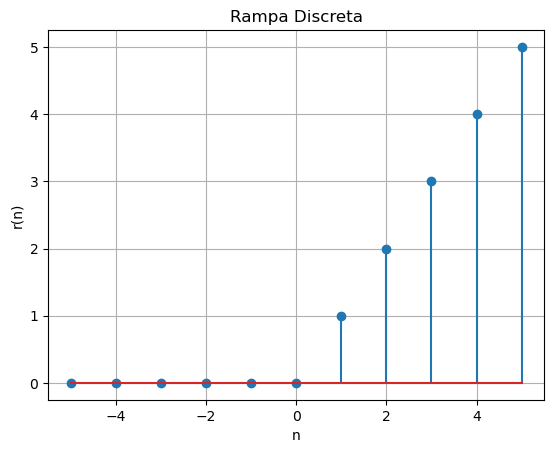

In [21]:
x, n = rampseq(0, -5, 5, 1)

plt.stem(n, x)
plt.xlabel("n")
plt.ylabel("r(n)")
plt.title("Rampa Discreta")
plt.grid()
plt.show()

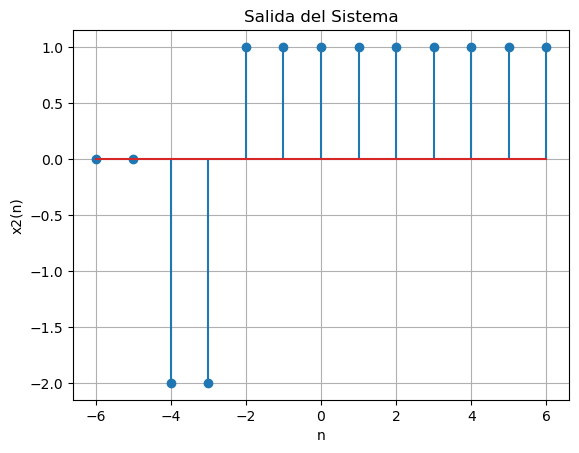

In [23]:
# Intervalo
n1, n2 = -6, 6

# Generamos escalones
u1, n = stepseq(-4, n1, n2)  # u(n+4)
u2, _ = stepseq(-2, n1, n2)  # u(n+2)

# Sistema
x2 = -2*u1 + 3*u2

# Graficar
plt.stem(n, x2)
plt.xlabel("n")
plt.ylabel("x2(n)")
plt.title("Salida del Sistema")
plt.grid()
plt.show()

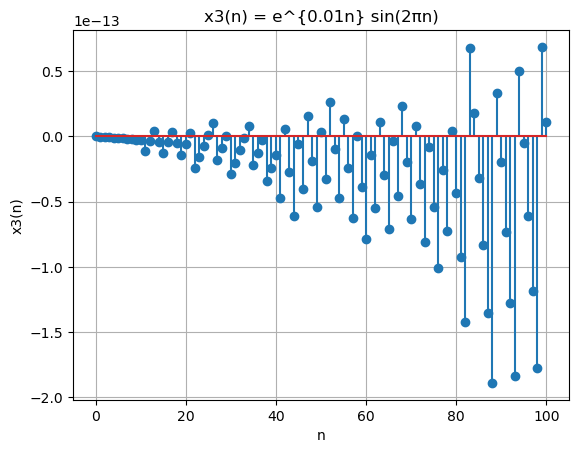

In [29]:
# Intervalo
n = np.arange(0, 101)

# Señal
x3 = np.exp(0.01*n) * np.sin(2*np.pi*n)

# Graficar
plt.stem(n, x3)
plt.xlabel("n")
plt.ylabel("x3(n)")
plt.title("x3(n) = e^{0.01n} sin(2πn)")
plt.grid()
plt.show()

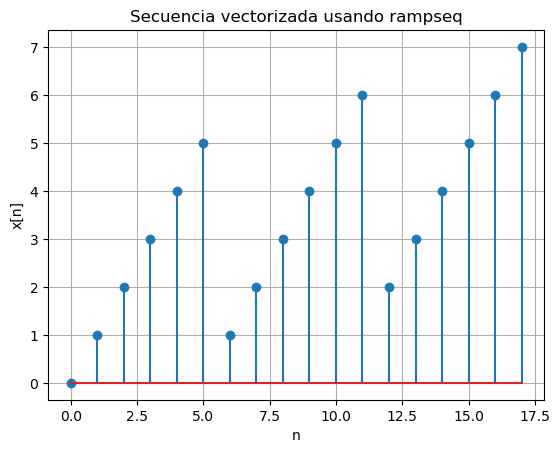

In [31]:
# Intervalo total
n1, n2 = 0, 17

# Generamos las tres rampas completas
r1, n = rampseq(0, n1, n2, 1)      # r[n]
r2, _ = rampseq(5, n1, n2, 1)      # r[n-5]
r3, _ = rampseq(10, n1, n2, 1)     # r[n-10]

# Creamos máscaras lógicas para cada tramo
mask1 = (n >= 0) & (n <= 5)
mask2 = (n >= 6) & (n <= 11)
mask3 = (n >= 12) & (n <= 17)

# Construcción vectorizada
x = r1*mask1 + r2*mask2 + r3*mask3

# Graficar
plt.stem(n, x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Secuencia vectorizada usando rampseq")
plt.grid()
plt.show()